In [22]:
import numpy as np
import matplotlib.pyplot as plt
from algorithms.ThompsonSampling.Non_Stationary_Environment import *
from algorithms.ThompsonSampling.TS_Learner import *
from algorithms.ThompsonSampling.SWTS_Learner import *

In [23]:
#n_arms = 3
#prices = np.array([300, 325, 350, 375, 400, 425, 450, 475])
#p1 = [[0.045, 0.04, 0.0325, 0.0275, 0.0250, 0.02, 0.0175, 0.0125],
 #             [0.045, 0.04, 0.0325, 0.0275, 0.0250, 0.02, 0.0175, 0.0125],
  #            [0.035, 0.03, 0.0225, 0.0175, 0.015, 0.01, 0.0075, 0.0025],
   #           [0.037, 0.032, 0.0245, 0.0195, 0.0170, 0.0120, 0.0095, 0.0045]]

prices = np.array(list(range(300,500,25)))
n_arms = np.size(prices)

p = []
for i in range(0,4):
    if(i == 0):
        a = np.random.uniform(0.02,0.000001,size=n_arms)
        a = np.sort(a)
        p.append(a[::-1]) 
    if(i == 1):
        p.append(p[0])
    if(i == 2):
        a = np.random.uniform(0.035,0.000001,size=n_arms)
        a = np.sort(a)
        p.append(a[::-1])
    if(i == 3):
        a = np.random.uniform(0.043,0.000001,size=n_arms)
        a = np.sort(a)
        p.append(a[::-1]) 


p = np.array(p)  
print(p)
    
    

T = 365*24

n_experiments = 100000
ts_rewards_per_experiment = []
swts_rewards_per_experiment = []
window_size = int(np.sqrt(T))


[[0.01863436 0.01794668 0.0135075  0.00998098 0.00991315 0.00748218
  0.00602405 0.00390261]
 [0.01863436 0.01794668 0.0135075  0.00998098 0.00991315 0.00748218
  0.00602405 0.00390261]
 [0.02838421 0.02685574 0.02513682 0.02049708 0.01397861 0.0083859
  0.00186786 0.00168391]
 [0.04215901 0.04084401 0.02992289 0.02842297 0.01728909 0.01249243
  0.00422275 0.00032336]]


In [24]:
def plotta(e, T, p, ts_rewards_per_experiment, swts_rewards_per_experiment):    
    ts_instantaneous_regret = np.zeros(T)
    swts_instantaneous_regret = np.zeros(T)
    n_phases = len(p)
    phases_len = T/n_phases
    opt_per_phases = p.max(axis=1)
    optimum_per_round = np.zeros(T)

    for i in range(0, n_phases):
        optimum_per_round[int(i*phases_len) : int((i+1)*phases_len)] = opt_per_phases[i]
        ts_instantaneous_regret[int(i*phases_len) : int((i+1)*phases_len)] = opt_per_phases[i] - np.mean(ts_rewards_per_experiment, axis=0)[int(i*phases_len)]
        swts_instantaneous_regret[int(i*phases_len) : int((i+1)*phases_len)] = opt_per_phases[i] - np.mean(swts_rewards_per_experiment, axis=0)[int(i*phases_len)]

    plt.figure(0)
    plt.ylabel("Reward")
    plt.xlabel("t")
    plt.plot(np.mean(ts_rewards_per_experiment, axis=0), 'r')
    plt.plot(np.mean(swts_rewards_per_experiment, axis=0), 'b')
    plt.plot(optimum_per_round, '--k')
    plt.legend(["TS", "SW-TS", "Optimum"])

    plt.figure(1)
    plt.ylabel("Regret")
    plt.xlabel("t")
    plt.plot(np.cumsum(ts_instantaneous_regret), 'r')
    plt.plot(np.cumsum(swts_instantaneous_regret), 'b')
    plt.legend(["TS", "SW-TS"])
    plt.show()

0


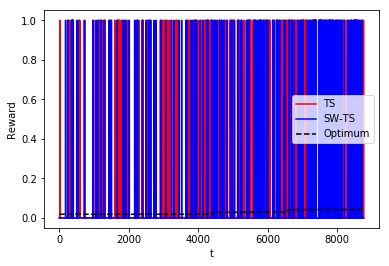

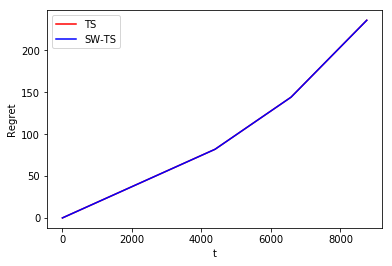

100


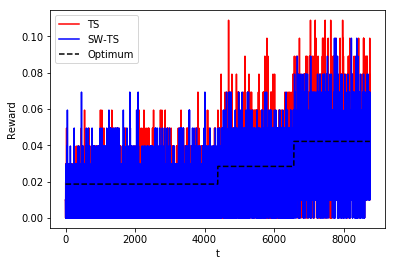

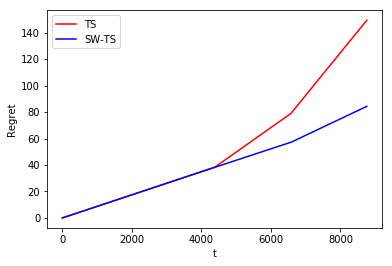

200


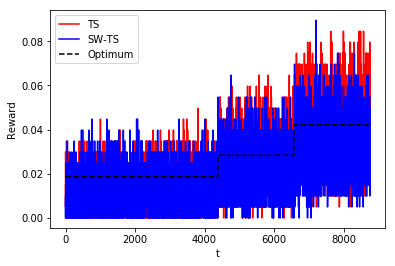

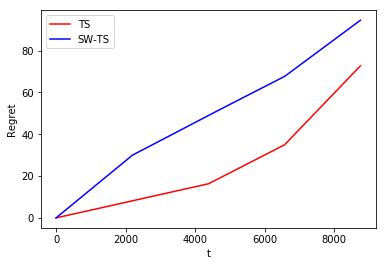

300


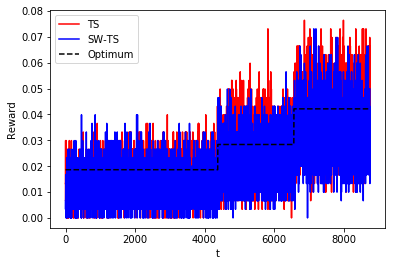

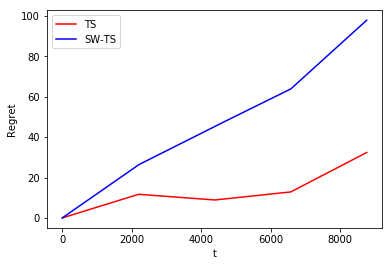

400


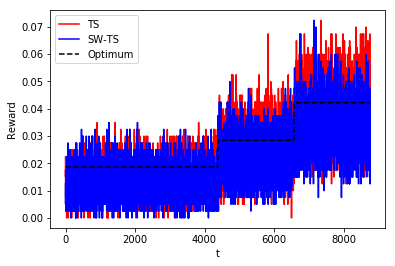

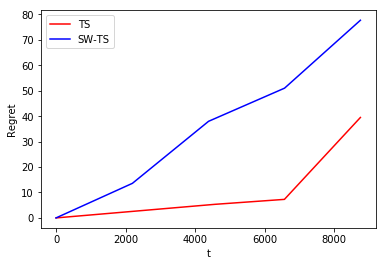

500


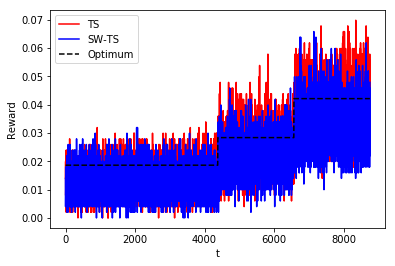

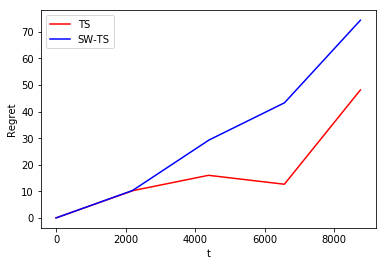

600


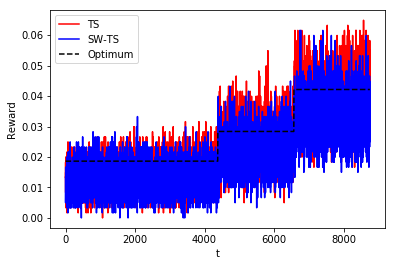

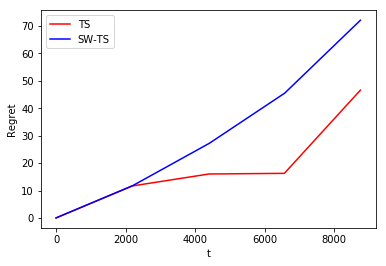

700


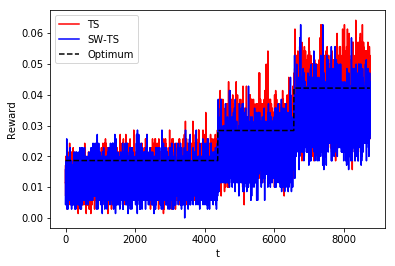

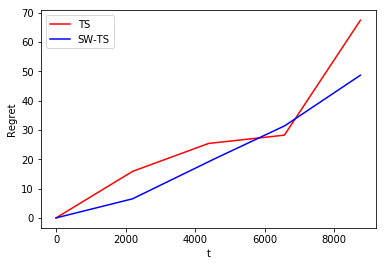

800


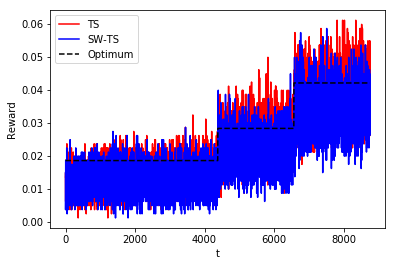

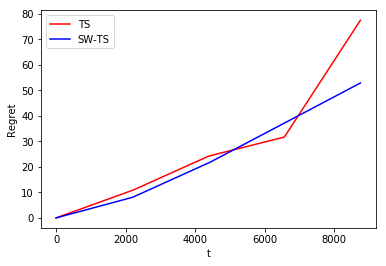

900


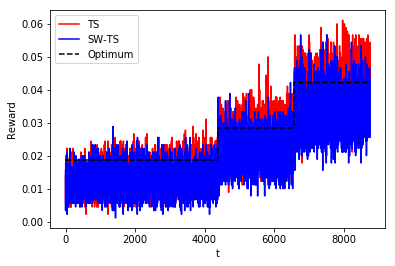

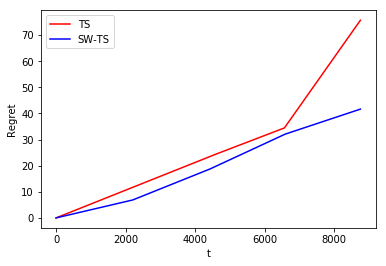

1000


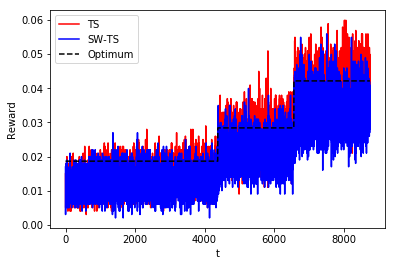

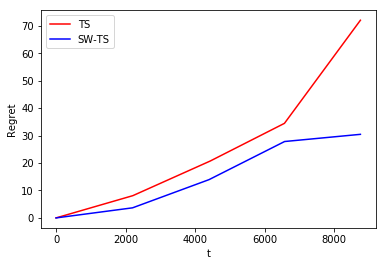

1100


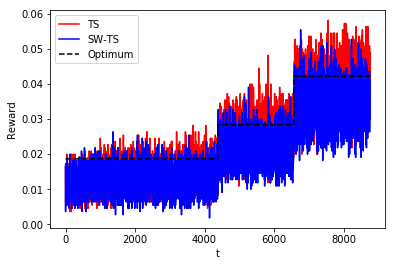

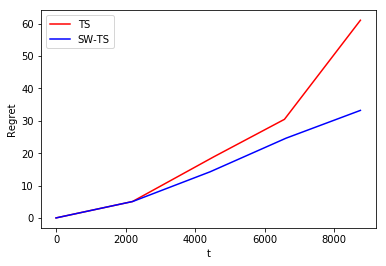

1200


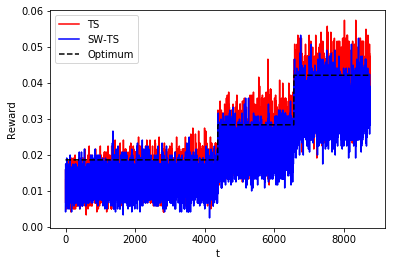

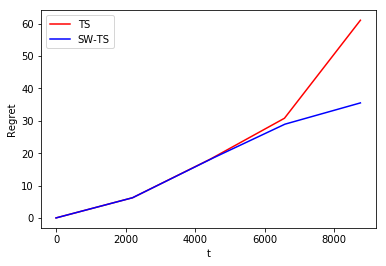

1300


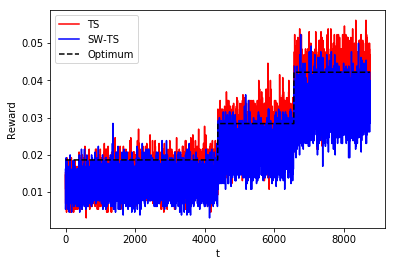

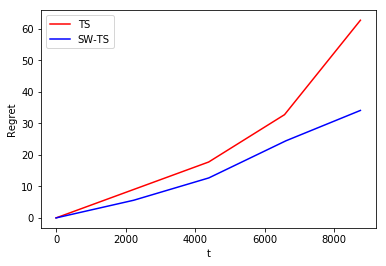

1400


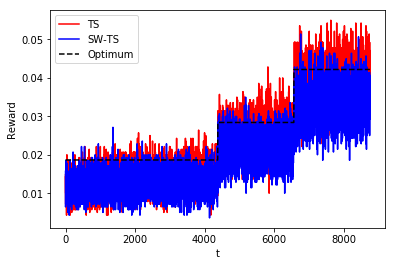

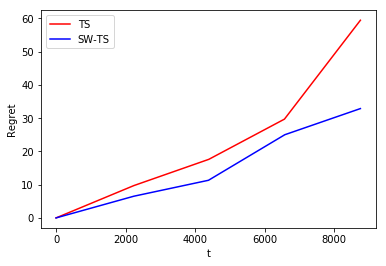

1500


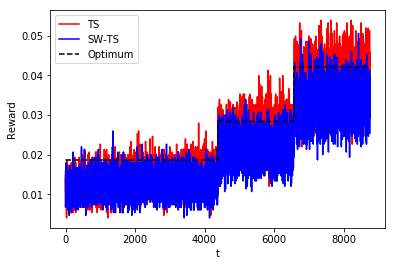

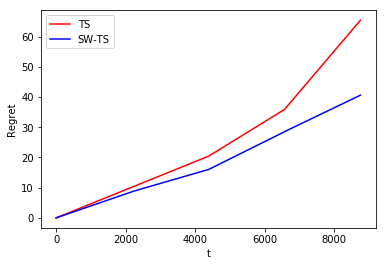

1600


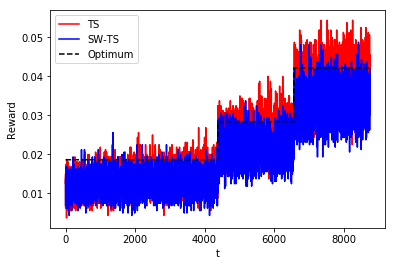

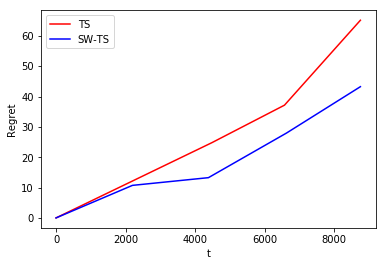

1700


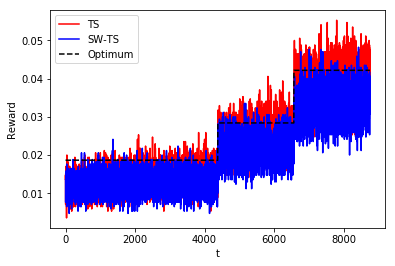

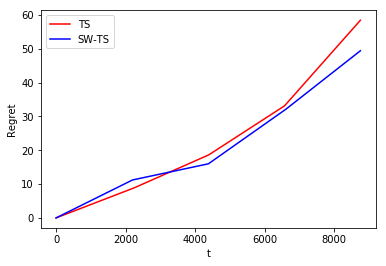

1800


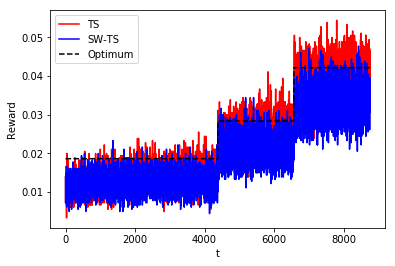

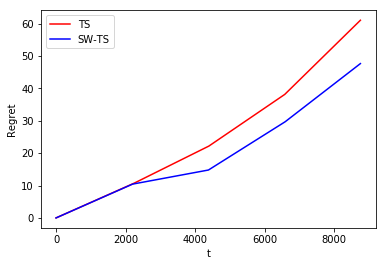

1900


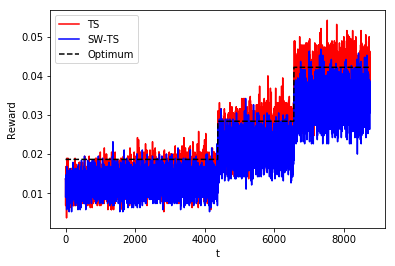

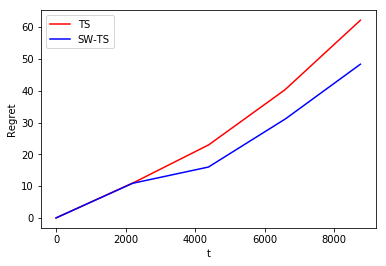

2000


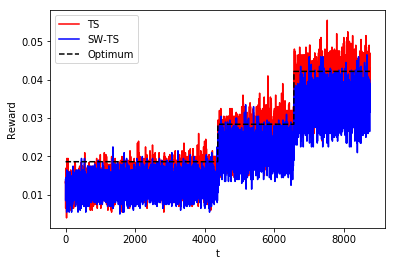

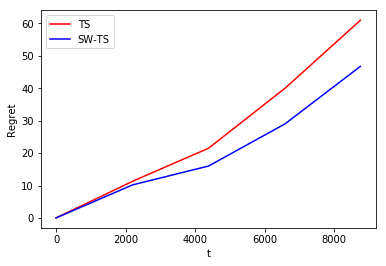

2100


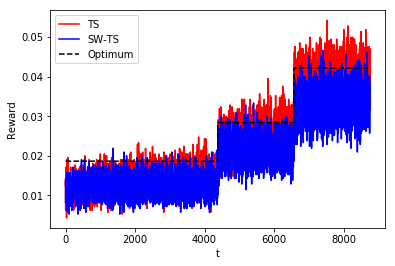

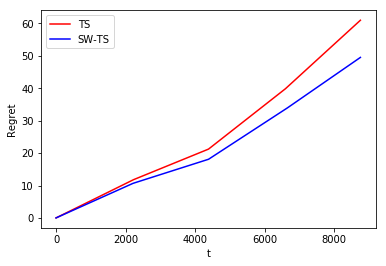

2200


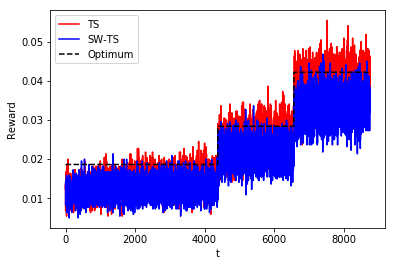

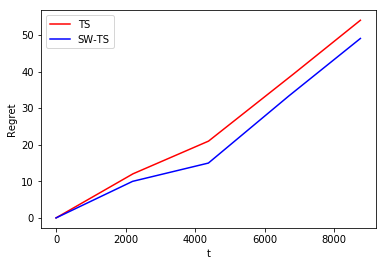

2300


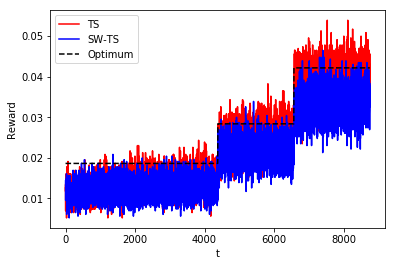

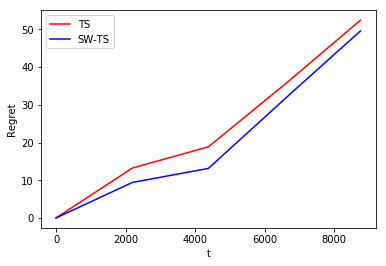

2400


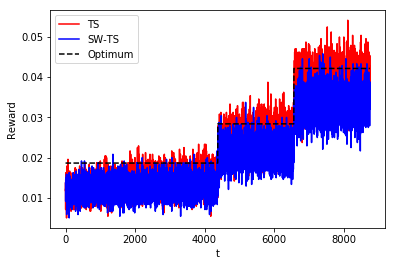

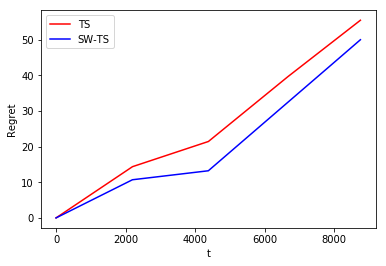

2500


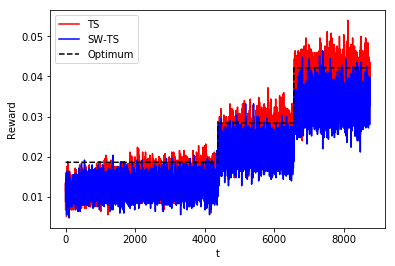

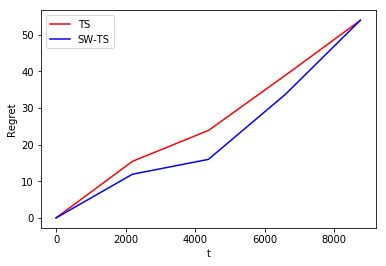

2600


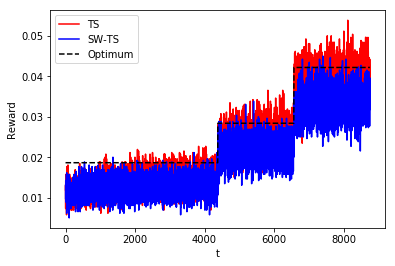

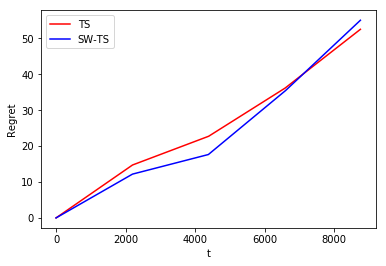

2700


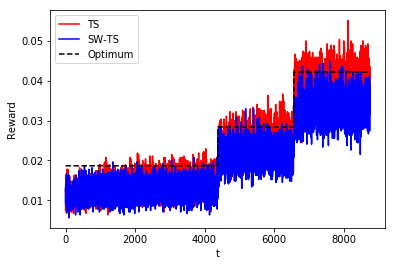

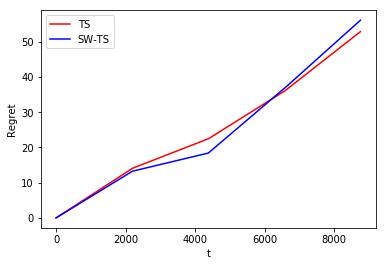

2800


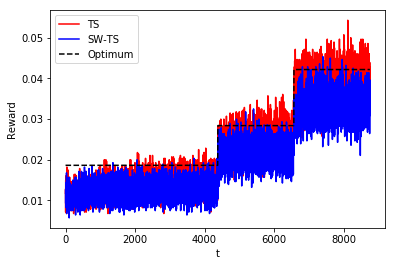

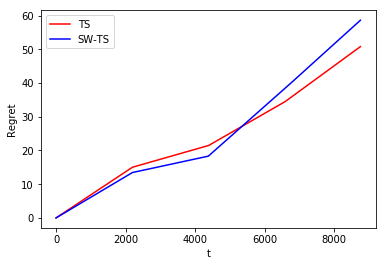

2900


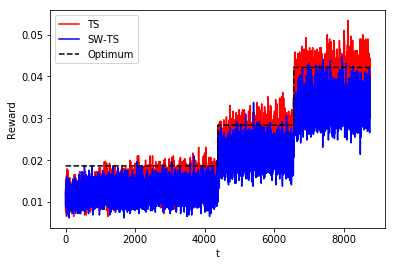

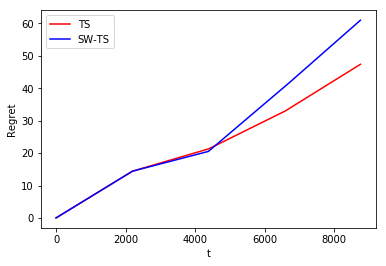

3000


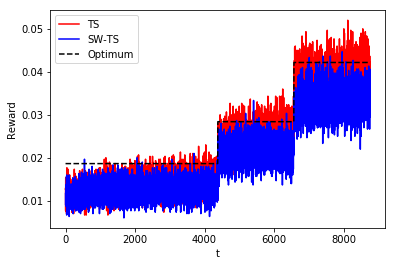

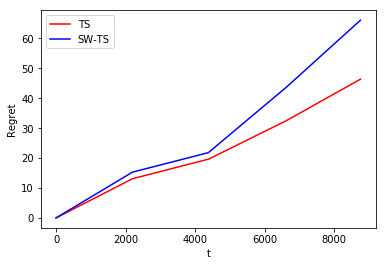

3100


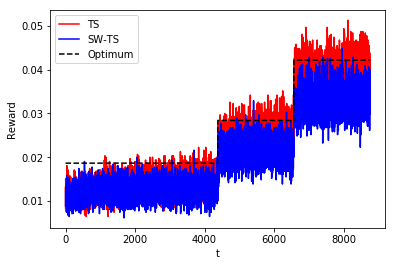

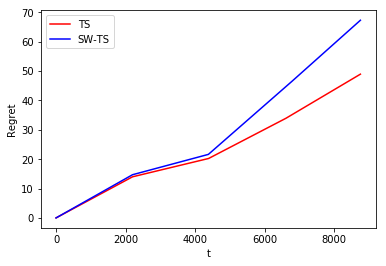

3200


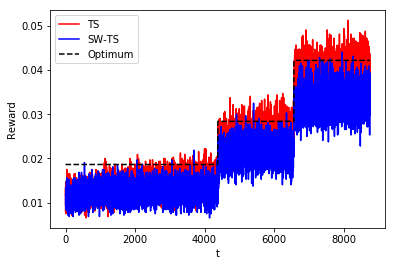

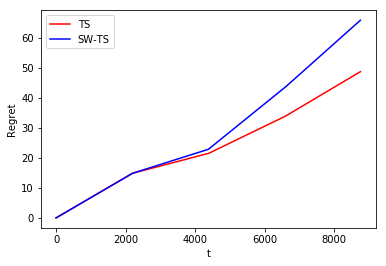

3300


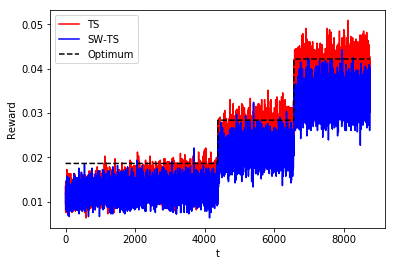

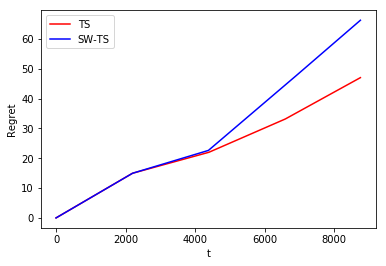

3400


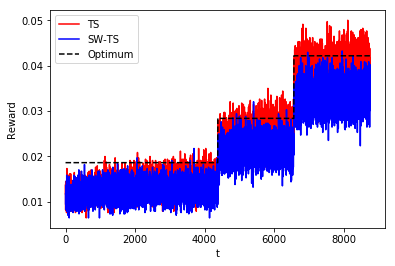

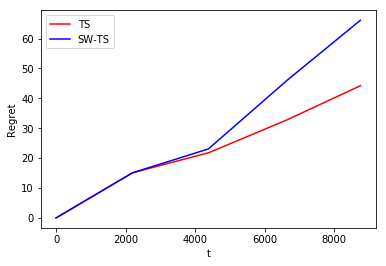

3500


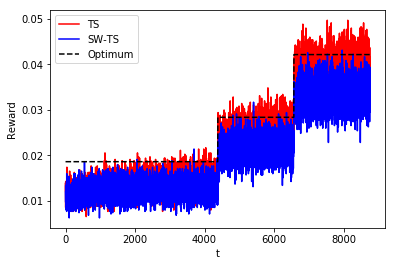

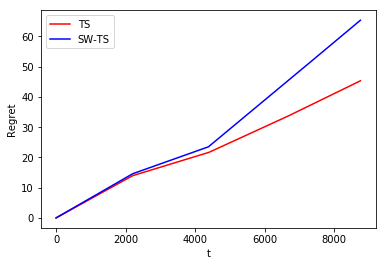

3600


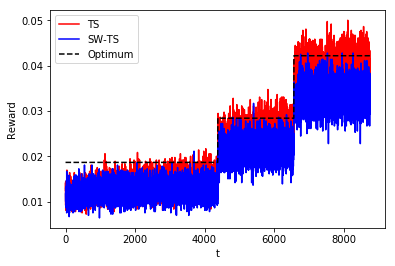

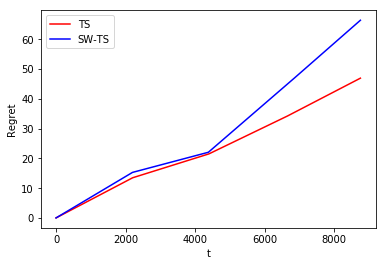

3700


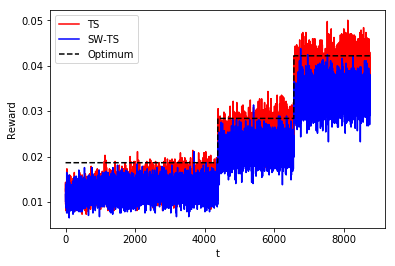

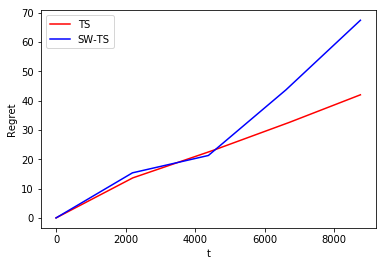

3800


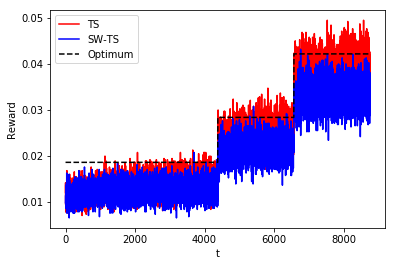

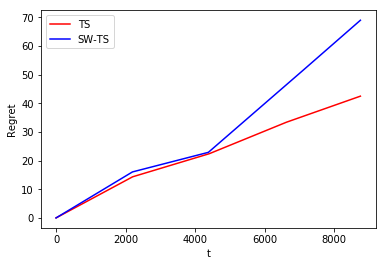

3900


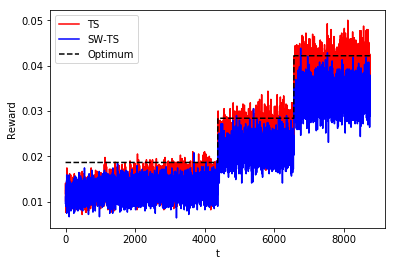

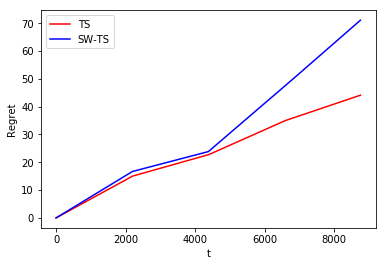

4000


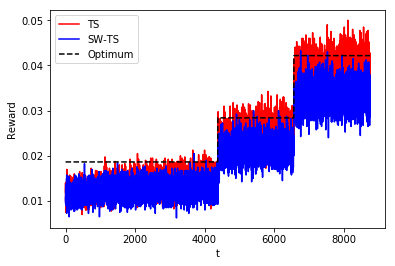

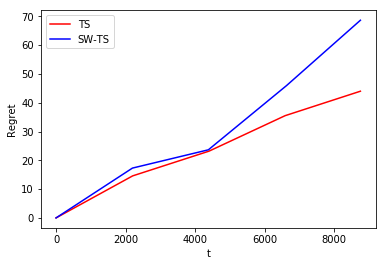

4100


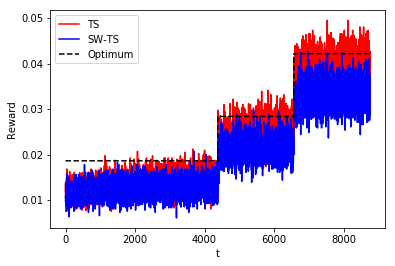

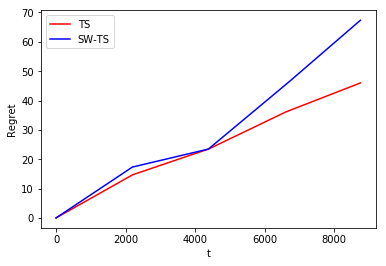

4200


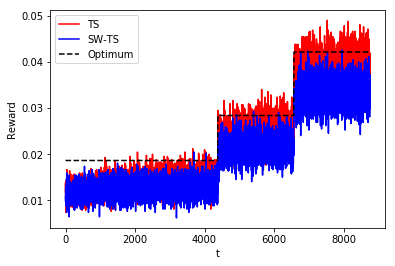

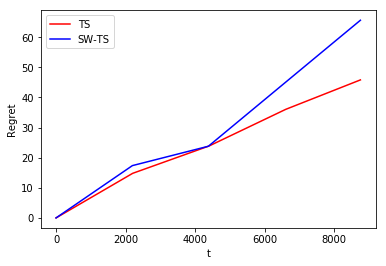

4300


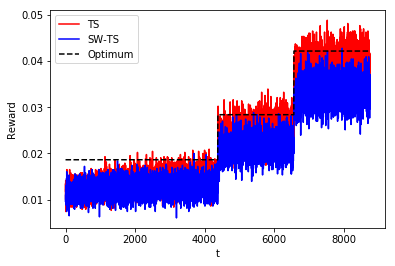

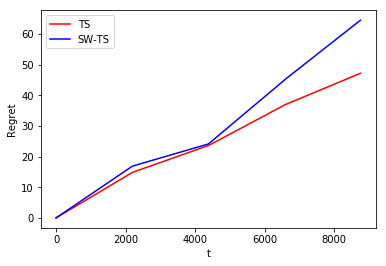

4400


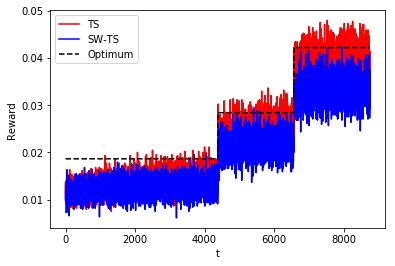

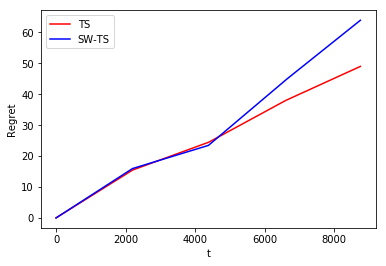

4500


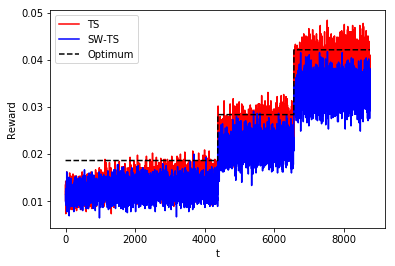

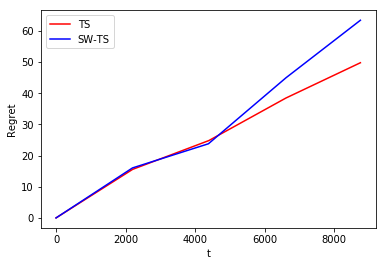

4600


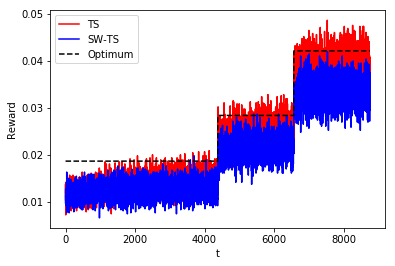

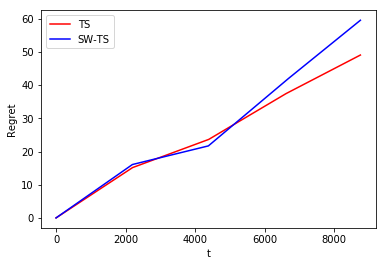

4700


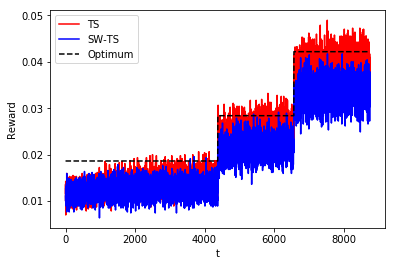

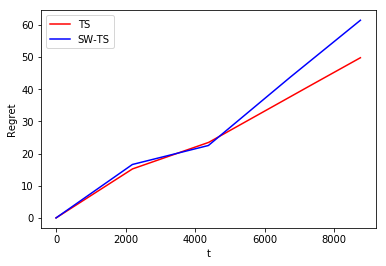

4800


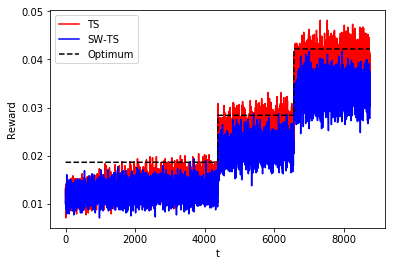

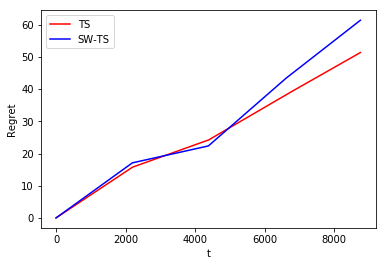

4900


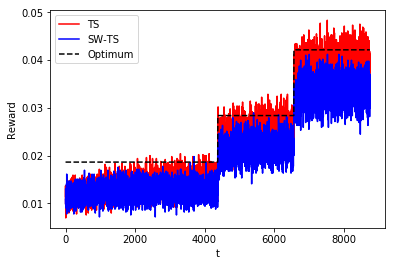

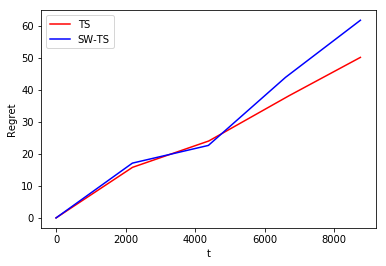

5000


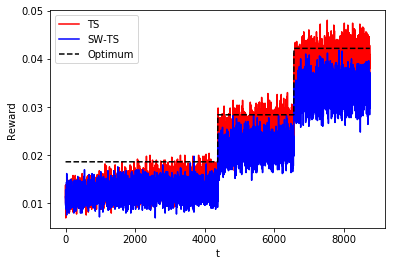

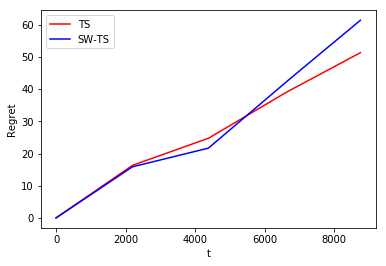

5100


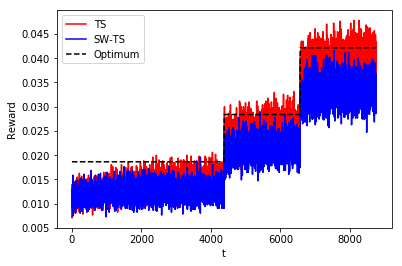

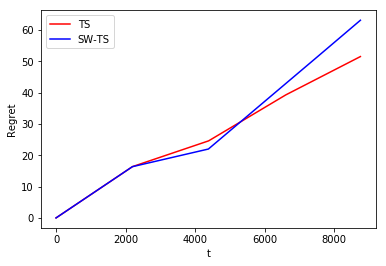

5200


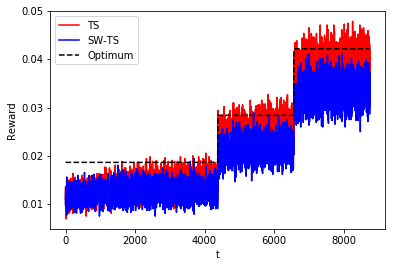

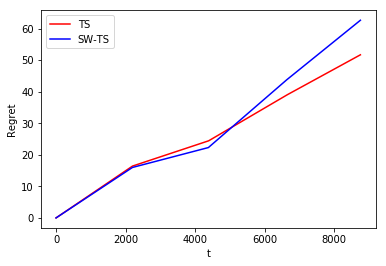

In [ ]:
for e in range(0, n_experiments):
    ts_env = Non_Stationary_Environment(n_arms=n_arms, probabilities=p, horizon=T, price=prices)
    ts_learner = TS_Learner(n_arms=n_arms)

    swts_env = Non_Stationary_Environment(n_arms=n_arms, probabilities=p, horizon=T, price=prices)
    swts_learner = SWTS_Learner(n_arms=n_arms, window_size=window_size)

    for t in range(0, T):
        pulled_arm = ts_learner.pull_arm()
        reward = ts_env.round(pulled_arm)
        reward_price = ts_env.round_price(pulled_arm)
        ts_learner.update(pulled_arm, reward)

        pulled_arm = swts_learner.pull_arm()
        reward = swts_env.round(pulled_arm)
        swts_learner.update(pulled_arm, reward)

    ts_rewards_per_experiment.append(ts_learner.collected_rewards)
    swts_rewards_per_experiment.append(swts_learner.collected_rewards)
    if(e % 100 == 0):
        print(e)
        plotta(e, T, p, ts_rewards_per_experiment, swts_rewards_per_experiment)

In [ ]:
ts_instantaneous_regret = np.zeros(T)
swts_instantaneous_regret = np.zeros(T)
n_phases = len(p)
phases_len = T/n_phases
opt_per_phases = p.max(axis=1)
optimum_per_round = np.zeros(T)

for i in range(0, n_phases):
    optimum_per_round[int(i*phases_len) : int((i+1)*phases_len)] = opt_per_phases[i]
    ts_instantaneous_regret[int(i*phases_len) : int((i+1)*phases_len)] = opt_per_phases[i] - np.mean(ts_rewards_per_experiment, axis=0)[int(i*phases_len)]
    swts_instantaneous_regret[int(i*phases_len) : int((i+1)*phases_len)] = opt_per_phases[i] - np.mean(swts_rewards_per_experiment, axis=0)[int(i*phases_len)]

In [ ]:
plt.figure(0)
plt.ylabel("Reward")
plt.xlabel("t")
plt.plot(np.mean(ts_rewards_per_experiment, axis=0), 'r')
plt.plot(np.mean(swts_rewards_per_experiment, axis=0), 'b')
plt.plot(optimum_per_round, '--k')
plt.legend(["TS", "SW-TS", "Optimum"])

In [ ]:
plt.figure(1)
plt.ylabel("Regret")
plt.xlabel("t")
plt.plot(np.cumsum(ts_instantaneous_regret), 'r')
plt.plot(np.cumsum(swts_instantaneous_regret), 'b')
plt.legend(["TS", "SW-TS"])